<h1>House Price Prediction</h1>

<h3>Load and Explore Dataset</h3>

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
#Load the Dataset
df = pd.read_csv("D:/House Price Prediction/house-prices-advanced-regression-techniques/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<h4>Basic info and summary of Dataset</h4>

In [60]:
#shape of dataset
print("Dataset Shape: ",df.shape)

#Column Name
print("Column: ", df.columns.tolist())

#Summary Statistics
df.describe()

#Data Type and missing values
df.info()

Dataset Shape:  (1460, 81)
Column:  ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',

<h4>Check Missing Values</h4>

In [63]:
#Total missing values per column
missing = df.isnull().sum()
missing[missing>0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

<h4>Target Variable Distribution (SalePrice)</h4>

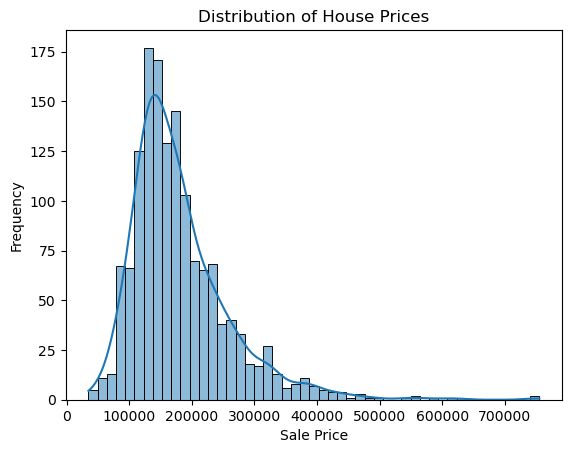

In [66]:
sns.histplot(df['SalePrice'], kde = True)
plt.title("Distribution of House Prices")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.show()

<h4>Correlation with SalePrice (Top Feature)</h4>

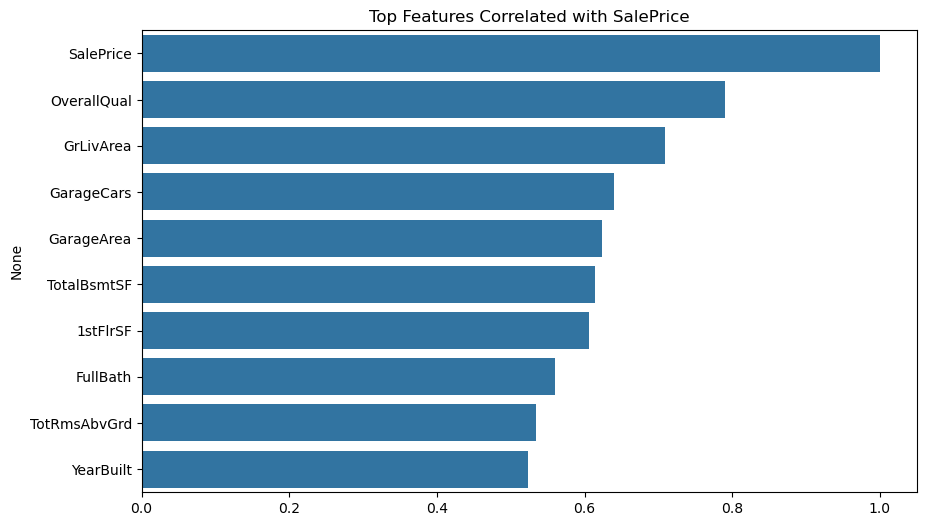

In [69]:
#correlation with SalePrice
corr = df.corr(numeric_only = True)
top_corr_features = corr['SalePrice'].sort_values(ascending = False).head(10)

#Plot Top Correlated Features
plt.figure(figsize = (10, 6))
sns.barplot(x = top_corr_features.values, y = top_corr_features.index)
plt.title("Top Features Correlated with SalePrice")
plt.show()

In [71]:
#Check Missing Values
#Show Top Columns with missing values
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

<h4>Drop Column with too many missing values</h4>

In [74]:
#Drop column with more than 80% missing data
threshold = len(df)*0.8
df = df.dropna(thresh = threshold, axis = 1)

<h4>Handle Remaining Missing Values</h4>

In [77]:
#Numerical Column - fill with median
num_cols = df.select_dtypes(include = ['int64', 'float64']).columns
for col in num_cols:
    df[col].fillna(df[col].median())

#Categorical Column - fill with mode
cat_cols = df.select_dtypes(include = ['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0])

<h4>Drop Unnecessary Column</h4>

In [80]:
#Drop Column that don't add predictive value
df.drop(['Id'], axis = 1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


<h4>Encode Categorical Variables</h4>

In [83]:
#One-hot encoding for categorical features
df = pd.get_dummies(df, drop_first = True)

<h4>Split Feature and Target Variable</h4>

In [86]:
#Define X (feature) and y (target)
X = df.drop('SalePrice', axis = 1)
y = df['SalePrice']

<h4>Train Test Split</h4>

In [89]:
from sklearn.model_selection import train_test_split

#80% training data, 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

<h3>Model Building and Evaluation</h3>

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [94]:
#Initialize Model
lr = LinearRegression()

#train the model
lr.fit(X_train, y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

<h4>Make Predictions</h4>

In [ ]:
#Predict on training and testing data
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

<h4>Evaluate the Model</h4>

In [51]:
#training performance
print("Training Set Performance")
print("R2 Score:", r2_score(y_train, y_train_pred))
print("MSE:", mean_squared_error(y_train, y_train_pred))
print("MAE:", mean_absolute_error(y_train, y_train_pred))

#testing performance
print("\nTesting Set Performance")
print("R2 Score:", r2_score(y_test, y_test_pred))
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("MAE:", mean_absolute_error(y_test, y_test_pred))

Training Set Performance


NameError: name 'y_train_pred' is not defined

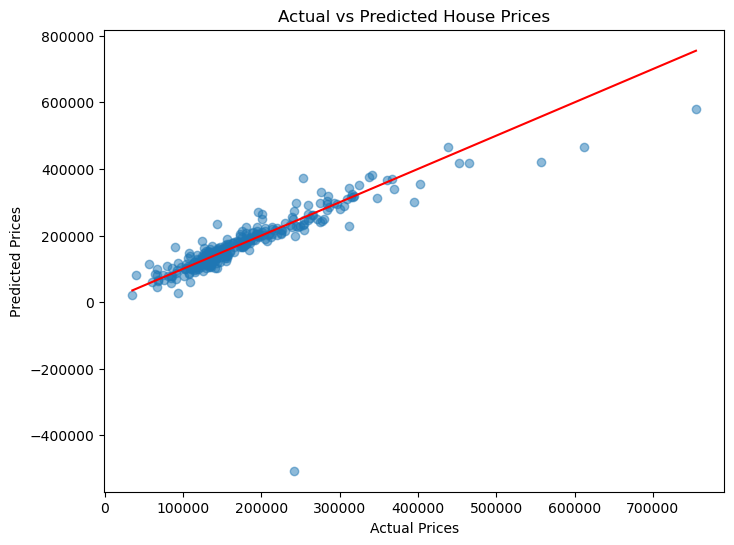

In [89]:
#View Actual VS Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # ideal line
plt.show()

<h4>Now Let's Try a Different Machine Learning Model - We will try Random Forest Regressor, It generally perform better than linear regeression.</h4>

In [93]:
from sklearn.ensemble import RandomForestRegressor

#Initialize Model
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

#Train the model
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [95]:
# Predict on training and test sets
y_train_rf = rf.predict(X_train)
y_test_rf = rf.predict(X_test)

In [97]:
# Training Performance
print("Random Forest - Training Set:")
print("R2 Score:", r2_score(y_train, y_train_rf))
print("MAE:", mean_absolute_error(y_train, y_train_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_rf)))

# Testing Performance
print("\nRandom Forest - Testing Set:")
print("R2 Score:", r2_score(y_test, y_test_rf))
print("MAE:", mean_absolute_error(y_test, y_test_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_rf)))

Random Forest - Training Set:
R2 Score: 0.9783733350774159
MAE: 6645.501344178082
RMSE: 11357.523166481695

Random Forest - Testing Set:
R2 Score: 0.8898902789159175
MAE: 17658.598219178082
RMSE: 29061.615221754313


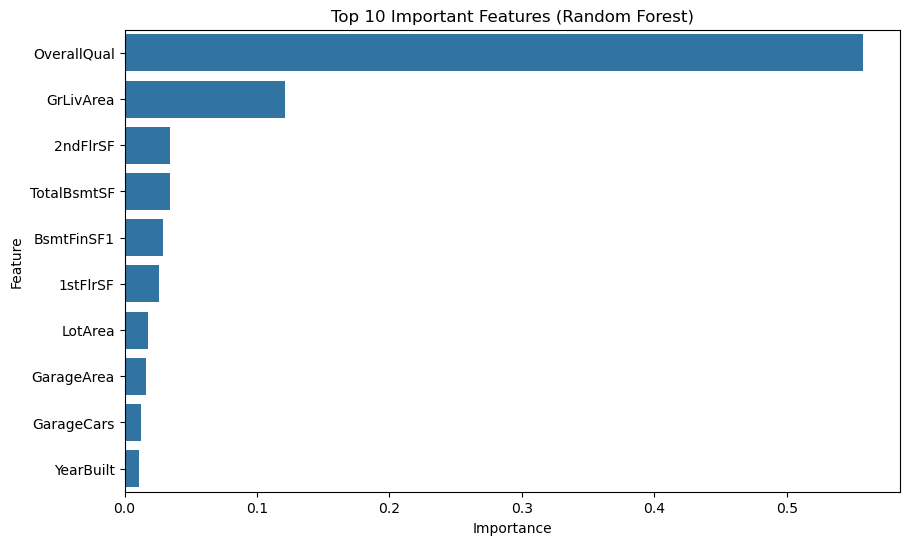

In [99]:
# Feature Importance plot
importances = rf.feature_importances_
features = X.columns

# Create a DataFrame for sorting and plotting
feature_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df)
plt.title('Top 10 Important Features (Random Forest)')
plt.show()

In [5]:
import pickle

with open('house_model.pkl', 'wb') as file:
    pickle.dump(rf, file)

NameError: name 'rf' is not defined